In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Preprocess the data
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# One-hot encode the labels
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(784,)),
    Dense(128, activation='relu'),  # 128 neurons in the first hidden layer
    Dense(64, activation='relu'),  # 64 neurons in the second hidden layer
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=128)



Epoch 1/5


469/469 [==============================] - 2s 3ms/step - loss: 0.3291 - accuracy: 0.9073
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1320 - accuracy: 0.9611
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0882 - accuracy: 0.9735
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0677 - accuracy: 0.9797
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0527 - accuracy: 0.9841


In [4]:
# Get the layer outputs for the test data
layer_outputs = []
for layer in model.layers:
    if hasattr(layer, 'output'):
        layer_model = tf.keras.Model(inputs=model.input, outputs=layer.output)
        layer_outputs.append(layer_model.predict(x_test))

# Compute the neuron activations averaged for each label
num_layers = len(layer_outputs)
num_neurons = sum(outputs.shape[-1] for outputs in layer_outputs)
neuron_activations = np.zeros((num_classes, num_neurons))

for label_idx in range(num_classes):
    label_test_data = x_test[np.argmax(y_test, axis=1) == label_idx]
    label_activations = np.zeros((num_neurons,))
    neuron_idx = 0
    for j, outputs in enumerate(layer_outputs):
        num_neurons_in_layer = outputs.shape[-1]
        label_activations[neuron_idx:neuron_idx + num_neurons_in_layer] = np.mean(outputs[np.argmax(y_test, axis=1) == label_idx], axis=0)
        neuron_idx += num_neurons_in_layer
    neuron_activations[label_idx] = label_activations

# Print the neuron activations matrix
print(neuron_activations)

313/313 [==============================] - 0s 1ms/step
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.20062963e-03
  2.63026170e-03 2.74556782e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.76455908e-04
  1.53182242e-02 9.80128898e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.05129201e-02
  1.08678089e-02 1.66030732e-04]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.52026725e-01
  5.47928968e-03 1.40371481e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.41369149e-03
  9.42060351e-01 5.39580081e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.61111809e-03
  7.32297124e-03 9.57027853e-01]]


In [5]:
len(neuron_activations)

10

<Figure size 1200x1200 with 0 Axes>

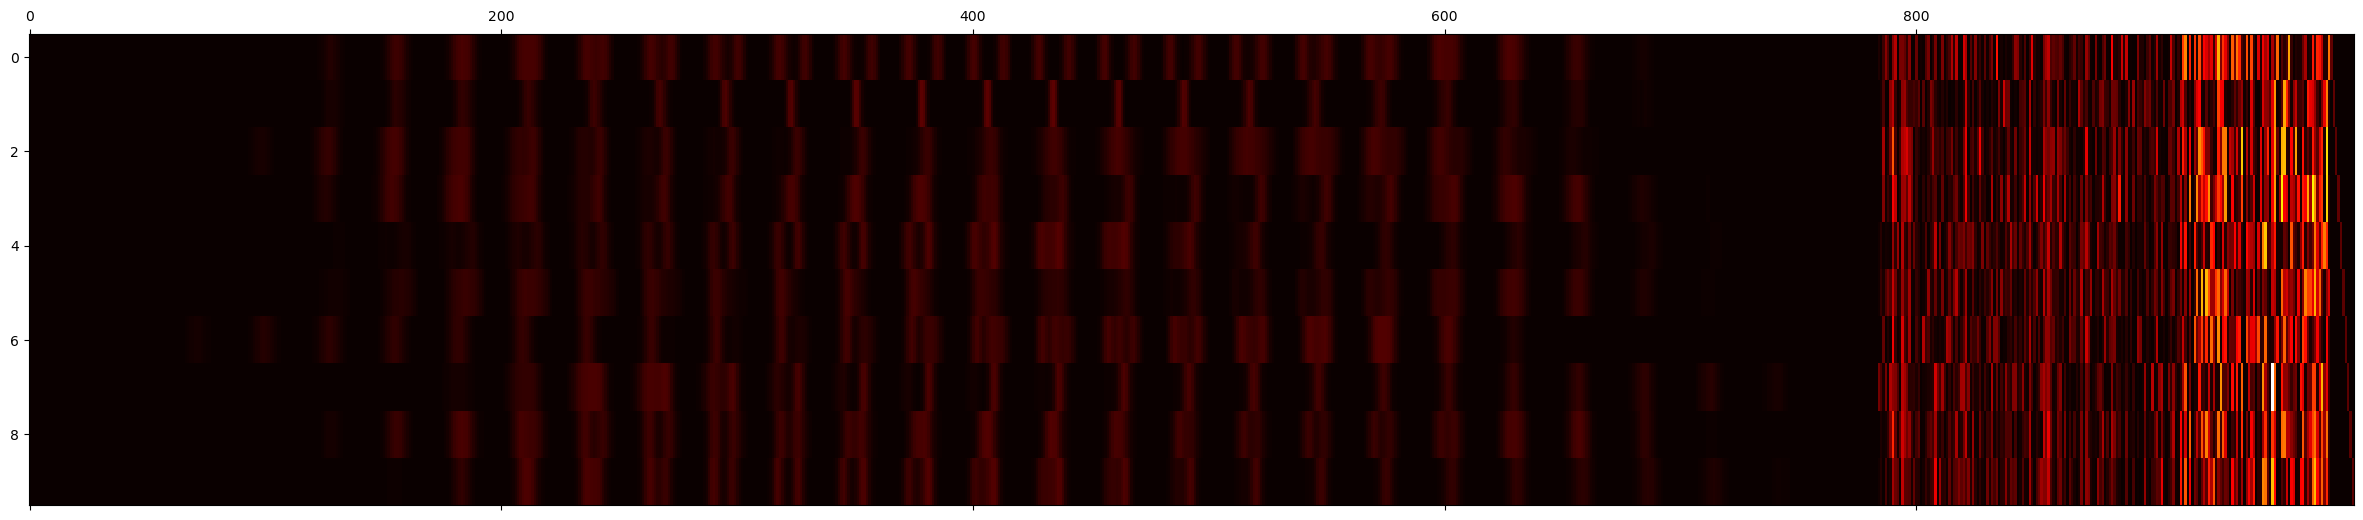

In [6]:
#plot the matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))  # Set the initial figure size
plt.matshow(neuron_activations, cmap='hot', interpolation='nearest', aspect=20)
plt.gcf().set_figheight(12)
plt.gcf().set_figwidth(30)
plt.show()


In [7]:
# Get the layer outputs for the test data
layer_outputs = []
for layer in model.layers:
    if hasattr(layer, 'output'):
        layer_model = tf.keras.Model(inputs=model.input, outputs=layer.output)
        layer_outputs.append(layer_model.predict(x_test))

# Compute the neuron activations averaged for each label and each layer
layer_activations = []
for outputs in layer_outputs:
    num_neurons_in_layer = outputs.shape[-1]
    layer_activation = np.zeros((num_classes, num_neurons_in_layer))
    for label_idx in range(num_classes):
        layer_activation[label_idx] = np.mean(outputs[np.argmax(y_test, axis=1) == label_idx], axis=0)
    layer_activations.append(layer_activation)

# Print the neuron activations matrix for each layer
for i, layer_activation in enumerate(layer_activations):
    print(f"Layer {i} neuron activations:")
    print(layer_activation)
    print()

313/313 [==============================] - 0s 1ms/step
Layer 0 neuron activations:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Layer 1 neuron activations:
[[2.26958886e-01 3.28582153e-02 5.82745492e-01 ... 7.97120452e-01
  1.18279653e-02 5.09111226e-01]
 [9.68277629e-04 1.40976116e-01 7.56896794e-01 ... 1.23245323e+00
  3.27057438e-03 2.21411809e-01]
 [1.49591640e-02 9.17949080e-02 1.80990064e+00 ... 6.35962605e-01
  1.01147577e-01 1.90637743e+00]
 ...
 [1.23008478e+00 7.50207067e-01 1.54540911e-01 ... 1.50949395e+00
  4.05455589e-01 1.10941365e-01]
 [9.29906219e-03 2.22409889e-01 6.82896152e-02 ... 1.94929779e+00
  9.44994111e-03 1.50222540e-01]
 [1.21007346e-01 2.83716857e-01 1.81307495e-02 ... 1.30661082e+00
  1.21495061e-01 7.41719976e-02]]

Layer 2 neuron activations:
[[1.08179348e-02 3.50752473e+00 4.40868187e+00 0.00000000e+00
  3.19226313e+00 0.00000000e+00 3.4291927

<Figure size 1200x1200 with 0 Axes>

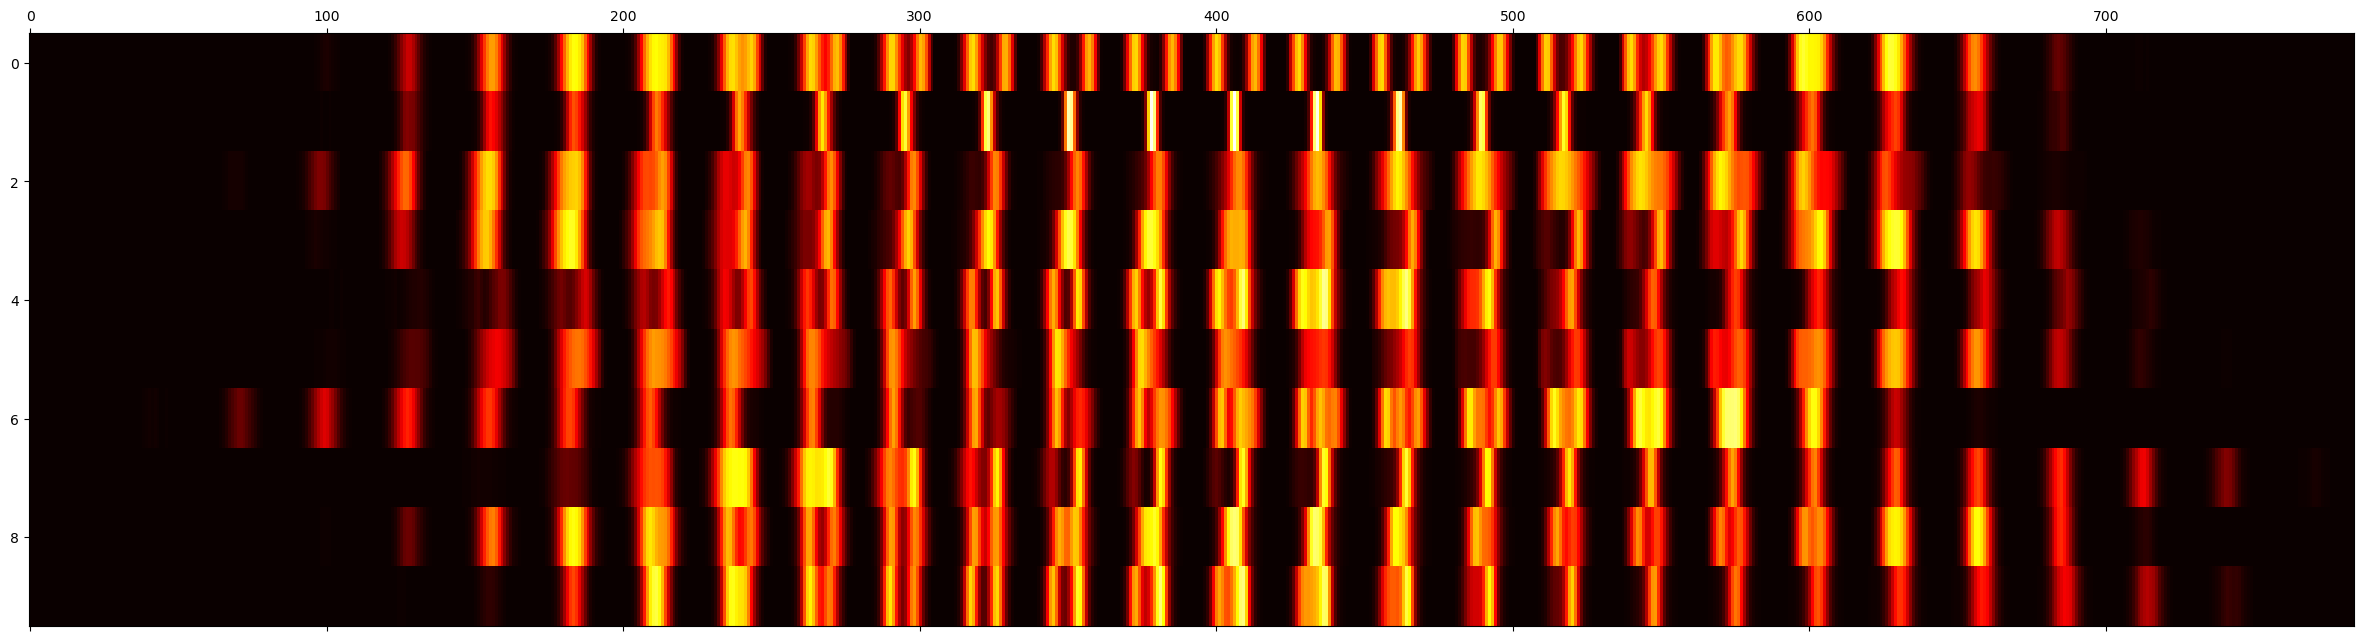

<Figure size 1200x1200 with 0 Axes>

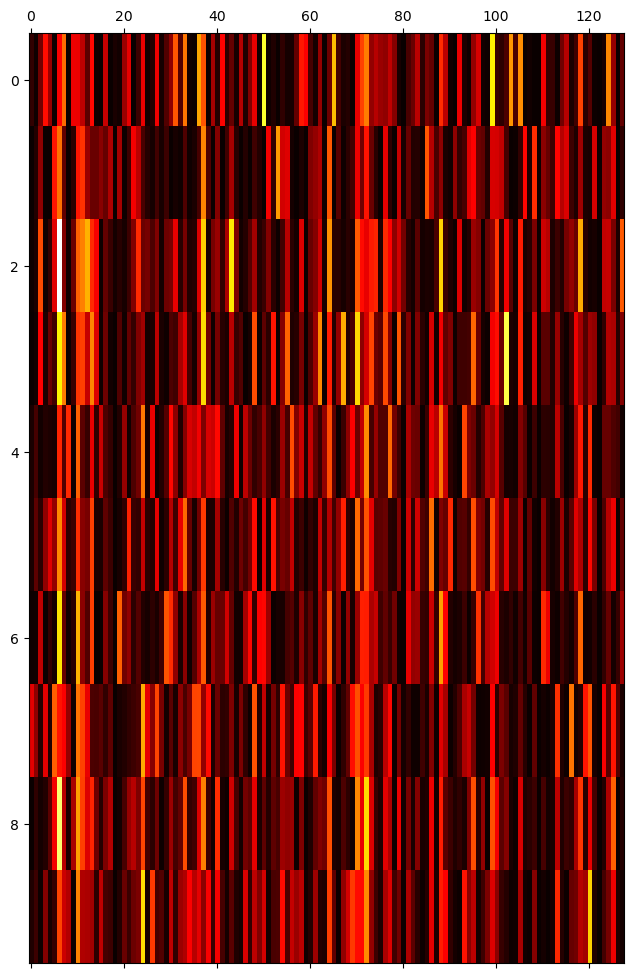

<Figure size 1200x1200 with 0 Axes>

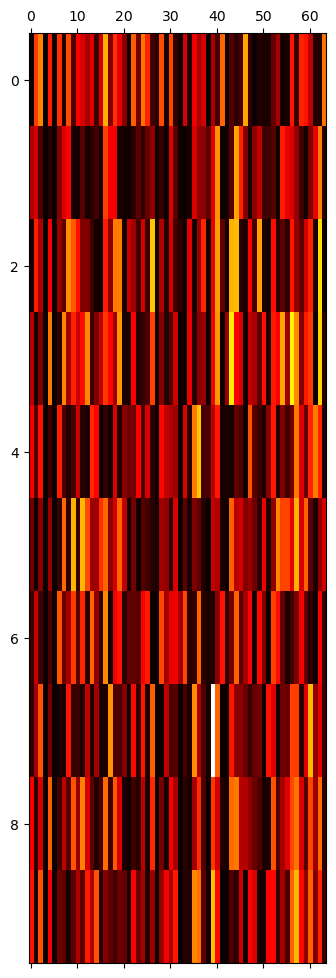

<Figure size 1200x1200 with 0 Axes>

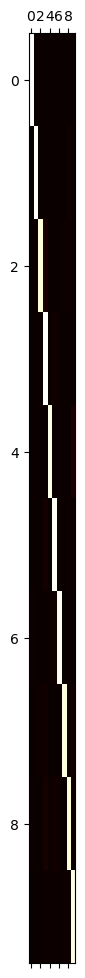

In [8]:
#plot the matrix
import matplotlib.pyplot as plt

for layer in layer_activations:
    plt.figure(figsize=(12, 12))  # Set the initial figure size
    plt.matshow(layer, cmap='hot', interpolation='nearest', aspect=20)
    plt.gcf().set_figheight(12)
    plt.gcf().set_figwidth(30)
    plt.show() 

Now I am going o go on a side track. Here my vision is to create a "Phantom 4" Where I perform data augmentation to remove the stalks from the 4s and then prove that I can sill recover the 4s with high accuracy using the ablation to elarn the stalk identification fromt the mean activation using PCA.

In [9]:
type(layer_activations)

list

In [10]:
# Here I am going to graph the initial 4 activation before I start
just_4 = []

max_len = max(len(layer) for layer in layer_activations)  # Find the maximum length

for layer in layer_activations:
    padded_layer = np.pad(layer, (0, max_len - len(layer)), 'constant', constant_values=0)  # Pad the layer
    just_4.append(padded_layer[4])

In [11]:
# Find the maximum length of any list in just_4
max_len = max(len(lst) for lst in just_4)

# Pad each list in just_4 to make them the same length
just_4_padded = [np.pad(lst, (0, max_len - len(lst)), 'constant', constant_values=0) for lst in just_4]

# Convert the padded list of lists to a numpy array
just_4_array = np.array(just_4_padded)

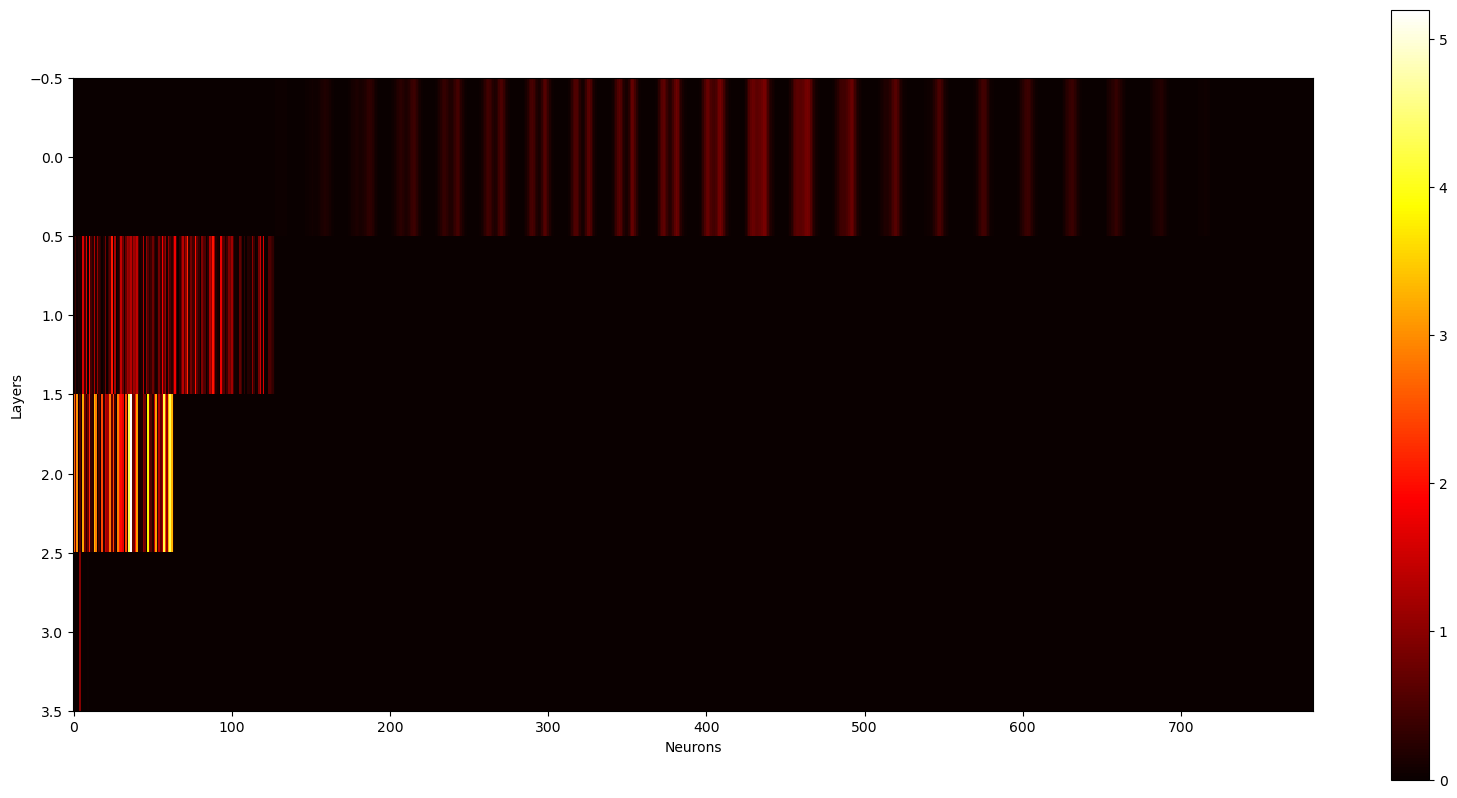

In [12]:
# Create a heatmap
plt.imshow(just_4_array, cmap='hot', interpolation='nearest', aspect=100)
plt.colorbar()  # Show color scale
plt.gcf().set_figheight(10)
plt.gcf().set_figwidth(20)
plt.ylabel('Layers')
plt.xlabel('Neurons')
plt.show()

Now its time to get the augmented 4s

In [13]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

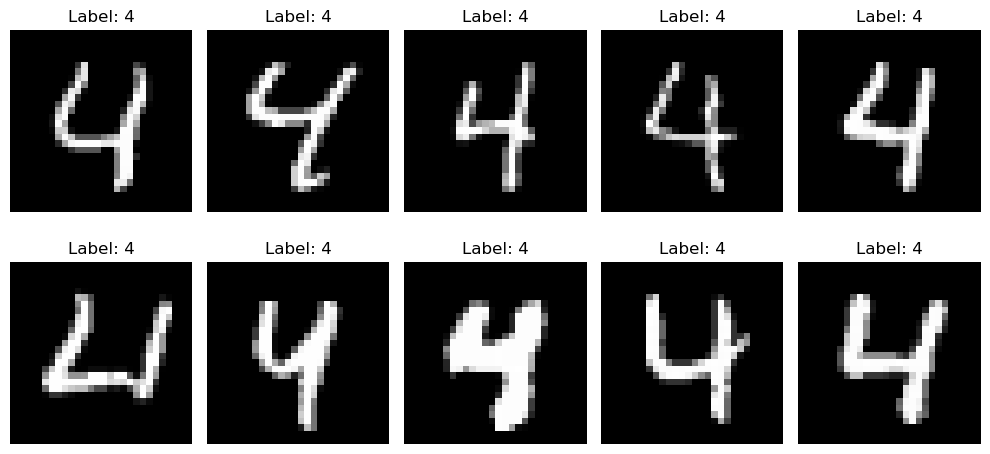

In [14]:
# Show 10 4s
list_4s = []
for i in range(len(x_test)):
    if y_test[i] == 4:
        list_4s.append(x_test[i])

# plot 10 images with the label 4
fig, axs = plt.subplots(2, 5, figsize=(10, 5)) 
for i in range(10):
    row = i // 5 
    col = i % 5  
    axs[row, col].imshow(list_4s[i].reshape(28, 28), cmap='gray') 
    axs[row, col].set_title(f'Label: {4}')  
    axs[row, col].axis('off')  
plt.tight_layout() 
plt.show() 

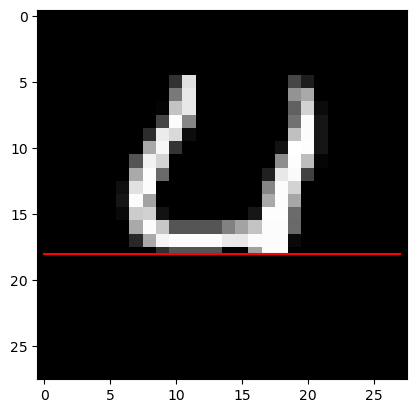

In [15]:
# uninformed approach
plt.imshow(list_4s[0].reshape(28, 28), cmap='gray')
plt.plot([0, 27], [18, 18], color='red')  # Add this line
# make everything below this line black
plt.fill_between([0, 27], 18, 27, color='black')
plt.show()

In [16]:
# Informed Appraoch
def find_best_line(image):
    max_row = 0
    max_row_idx = 0

    for i, row in enumerate(image):
        temp_row = 0
        for val in row:
            temp_row += val
        if temp_row > max_row:
            max_row = temp_row
            max_row_idx = i
    return max_row_idx
    # return max_row, max_row_idx

def showNewAbalatedImage(image):
    max_row_idx = find_best_line(image)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    # plt.plot([0, 27], [max_row_idx, max_row_idx], color='red')  # Add this line
    plt.fill_between([0, 27], max_row_idx, 27, color='black')
    # plt.savefig('modified_image.png')  # Save the images to make a new dataset
    plt.show()

def saveNewAbalatedImage(image, index):
    max_row_idx = find_best_line(image)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    # plt.plot([0, 27], [max_row_idx, max_row_idx], color='red')  # Add this line
    plt.fill_between([0, 27], max_row_idx, 27, color='black')
    # save image with a unique name to folder \dataset
    np.save('dataset/abalated_image_' + str(index), list_4s[index].reshape(28, 28))

def showAbalationV2():
    pass

In [17]:
def find_best_vertical_line(image):
    # find the column in the image with the highest intensiy otal
    max_col = 0
    max_col_idx = 0

    for i in range(28):
        temp_col = 0
        for j in range(28):
            temp_col += image[j][i]
        if temp_col > max_col:
            max_col = temp_col
            max_col_idx = i
    return max_col_idx

def showNewAbalatedImageV2(image):
    max_col_idx = find_best_vertical_line(image)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.plot([max_col_idx, max_col_idx], [0, 27], color='red')  # Add this line
    plt.fill_between([0, 27], 0, max_col_idx, color='black')
    plt.show()

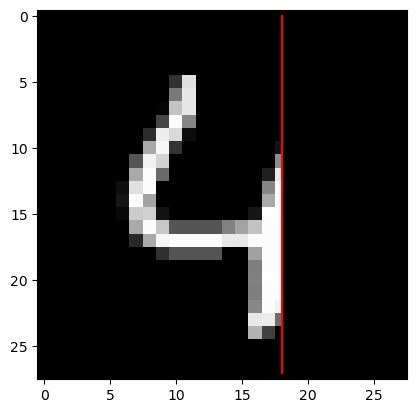

In [18]:
image = list_4s[0]
max_col_idx = find_best_vertical_line(image)
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.plot([max_col_idx, max_col_idx], [0, 27], color='red')  # Add this line
plt.fill_between([max_col_idx, 27], 0, 27, color='black')
plt.show()

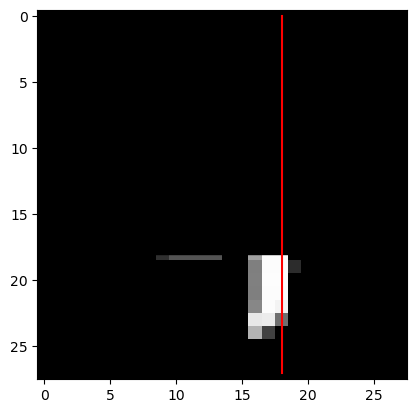

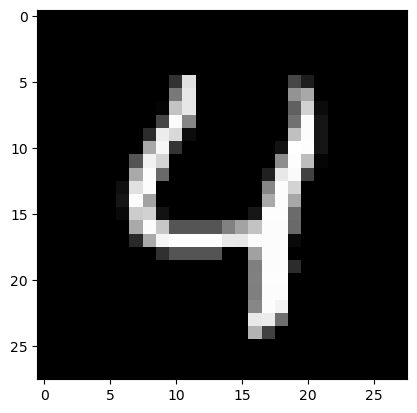

In [19]:
showNewAbalatedImageV2(list_4s[0])
plt.imshow(list_4s[0].reshape(28, 28), cmap='gray')
plt.show()

In [20]:
type(list_4s[0])

numpy.ndarray

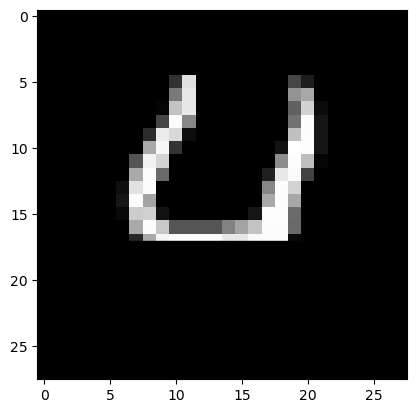

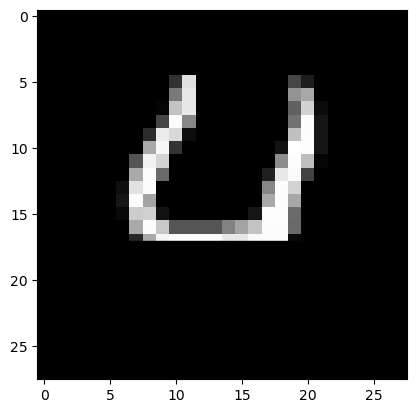

In [21]:
# plot 10 images with the label 4
for i in range(1):
    showNewAbalatedImage(list_4s[i])
    saveNewAbalatedImage(list_4s[i], i)

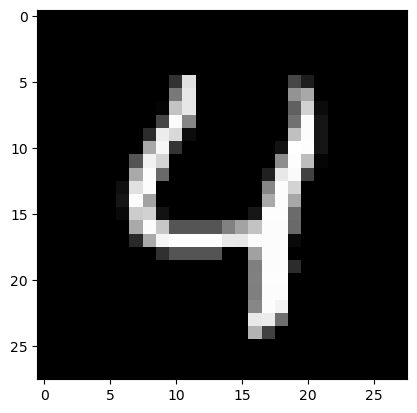

1/1 [==============================] - 0s 55ms/step
4


In [22]:
# show the numpy array in the dataset folder
import os
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = np.load('dataset/abalated_image_0.npy')

# Display the image
plt.imshow(image, cmap='gray')
plt.show()

# print the classificaton of the image
print(np.argmax(model.predict(image.reshape(1, 784))))


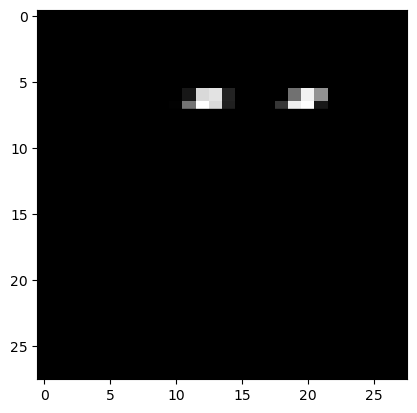

In [23]:
# Create the new dataset of stalked 4s
for index, image in enumerate(list_4s):
    saveNewAbalatedImage(image, index)

Now we are going to run the destalked 4s through the nn

In [24]:
# Preprocess the data
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# One-hot encode the labels
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(784,)),
    Dense(128, activation='relu'),  # 128 neurons in the first hidden layer
    Dense(64, activation='relu'),  # 64 neurons in the second hidden layer
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.3484 - accuracy: 0.9018
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1416 - accuracy: 0.9582
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0991 - accuracy: 0.9706
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0743 - accuracy: 0.9776
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0583 - accuracy: 0.9821


In [25]:
# Get the layer outputs for the test data
layer_outputs = []
for layer in model.layers:
    if hasattr(layer, 'output'):
        layer_model = tf.keras.Model(inputs=model.input, outputs=layer.output)
        layer_outputs.append(layer_model.predict(x_test))

# Compute the neuron activations averaged for each label and each layer
layer_activations = []
for outputs in layer_outputs:
    num_neurons_in_layer = outputs.shape[-1]
    layer_activation = np.zeros((num_classes, num_neurons_in_layer))
    for label_idx in range(num_classes):
        layer_activation[label_idx] = np.mean(outputs[np.argmax(y_test, axis=1) == label_idx], axis=0)
    layer_activations.append(layer_activation)

313/313 [==============================] - 0s 1ms/step


<Figure size 1200x1200 with 0 Axes>

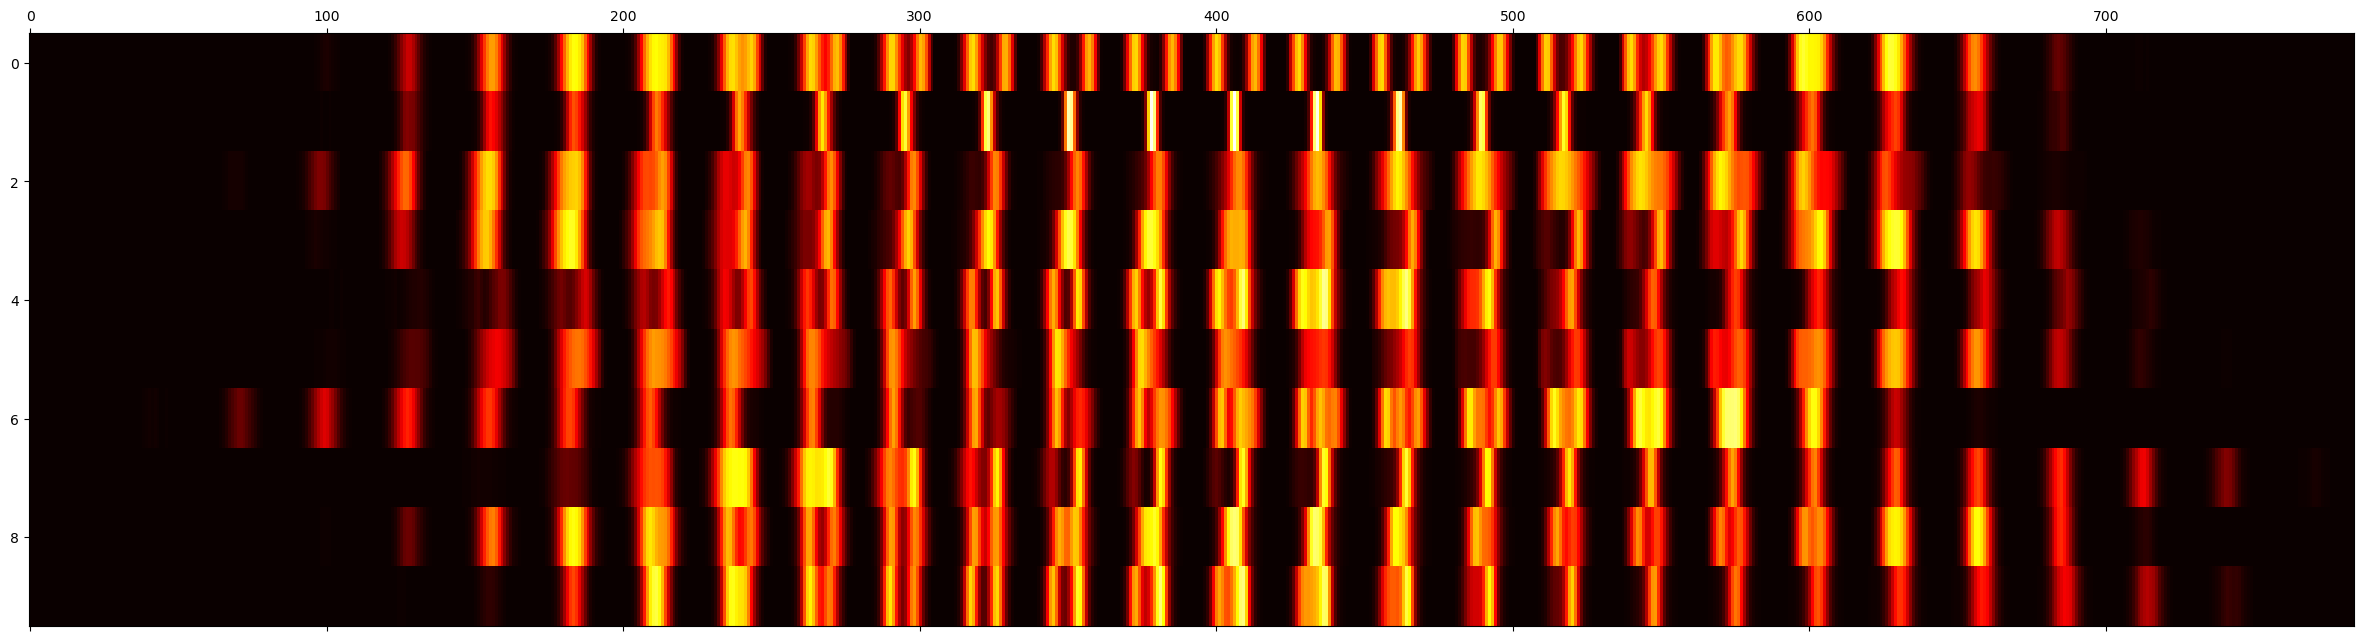

<Figure size 1200x1200 with 0 Axes>

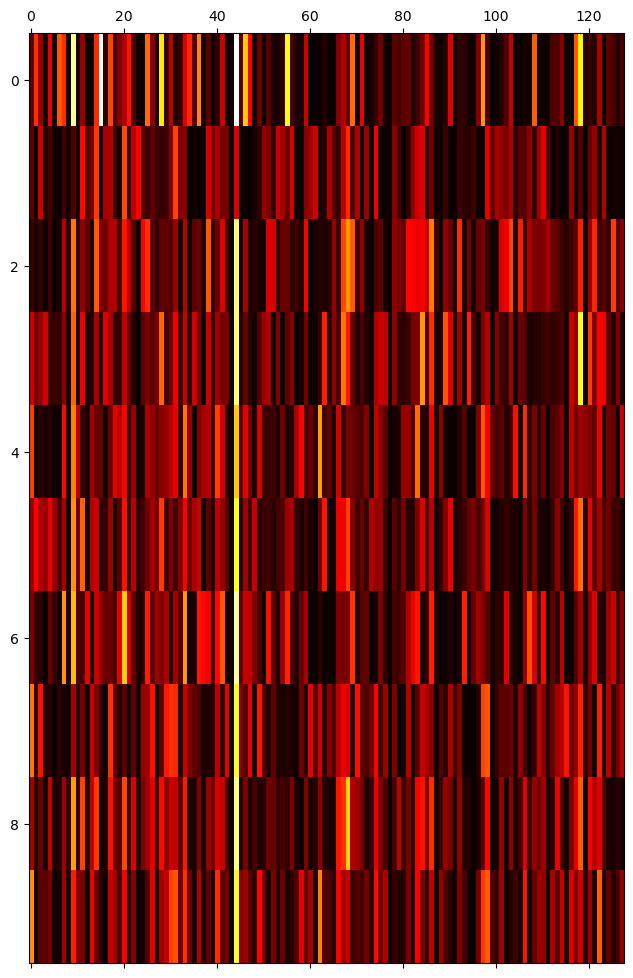

<Figure size 1200x1200 with 0 Axes>

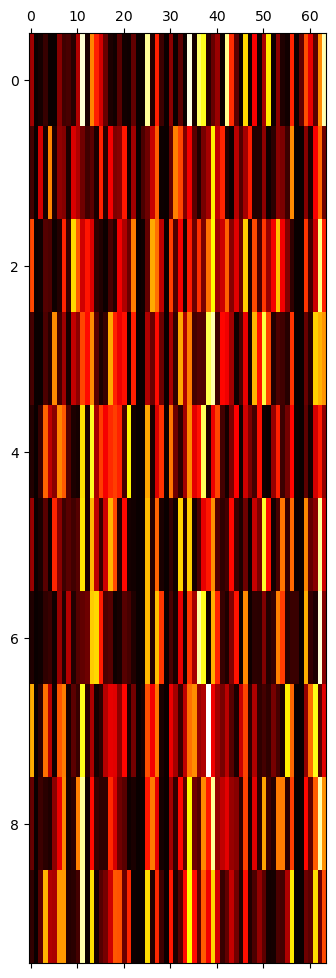

<Figure size 1200x1200 with 0 Axes>

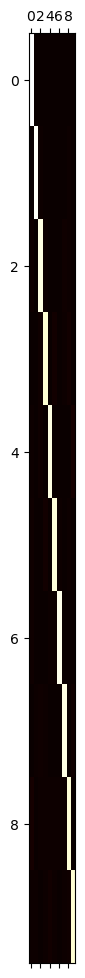

In [26]:
#plot the matrix
import matplotlib.pyplot as plt

for layer in layer_activations:
    plt.figure(figsize=(12, 12))  # Set the initial figure size
    plt.matshow(layer, cmap='hot', interpolation='nearest', aspect=20)
    plt.gcf().set_figheight(12)
    plt.gcf().set_figwidth(30)
    plt.show() 

Realized this will be easier with 7

In [27]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [28]:
list_7s = []
for i in range(len(x_test)):
    if y_test[i] == 7:
        list_7s.append(x_test[i])

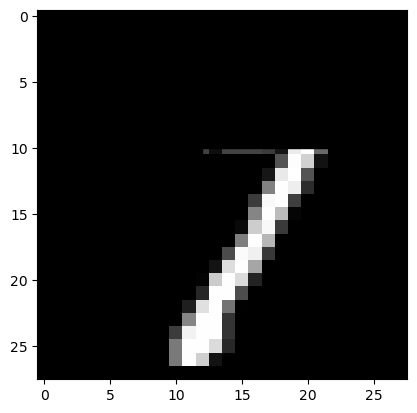

In [52]:
def find_best_line(image):
    max_row = 0
    max_row_idx = 0

    for i, row in enumerate(image):
        temp_row = 0
        for val in row:
            temp_row += val
        if temp_row > max_row:
            max_row = temp_row
            max_row_idx = i
    return max_row_idx
    # return max_row, max_row_idx

def showAblated7(image):
    max_row_idx = find_best_line(image)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    # plt.plot([0, 27], [max_row_idx+2, max_row_idx+2], color='red')  # Add this line
    plt.fill_between([0, 27], 0, max_row_idx+2, color='black')
    plt.fill_between([0, 12], 0, 17, color='black')
    plt.show()

def saveAblated7(image, index):
    max_row_idx = find_best_line(image)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    # plt.plot([0, 27], [max_row_idx, max_row_idx], color='red')  # Add this line
    plt.fill_between([0, 27], max_row_idx, 27, color='black')
    # save image with a unique name to folder \dataset
    np.save('7_dataset/abalated_image_' + str(index), list_4s[index].reshape(28, 28))

showAblated7(list_7s[0])

In [ ]:
#make a directory 7_dataset
import os
os.makedirs('7_dataset', exist_ok=True)

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

list_7s = [x_test[i] for i in range(len(x_test)) if y_test[i] == 7]

def find_best_line(image):
    row_sums = [sum(row) for row in image]
    max_row_idx = row_sums.index(max(row_sums))
    return max_row_idx

def saveAblated7(image, index):
    max_row_idx = find_best_line(image)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    # plt.plot([0, 27], [max_row_idx, max_row_idx], color='red')  # Add this line
    plt.fill_between([0, 27], max_row_idx, 27, color='black')
    plt.fill_between([0, 12], 0, 17, color='black')
    np.save('7_dataset/abalated_image_' + str(index), list_7s[index].reshape(28, 28))

def showAblated7(image):
    max_row_idx = find_best_line(image)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    # plt.plot([0, 27], [max_row_idx+2, max_row_idx+2], color='red')  # Add this line
    plt.fill_between([0, 27], 0, max_row_idx+2, color='black')
    plt.fill_between([0, 12], 0, 17, color='black')
    plt.show()

for index, image in enumerate(list_7s):
    saveAblated7(image, index)